![](../../img/chinahadoop.png)
# 模型的评估与参数调优


In [2]:
# 引入工具库
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
mpl.rcParams['legend.numpoints'] = 1

In [3]:
# 基本建模流程
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 构建数据集
X, y = make_blobs(random_state=0)
# 切分train和test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# 初始化模型对象并拟合
logreg = LogisticRegression().fit(X_train, y_train)
# 模型评估
logreg.score(X_test, y_test)

0.88

## 交叉验证/Cross-validation

TypeError: barh() missing 1 required positional argument: 'y'

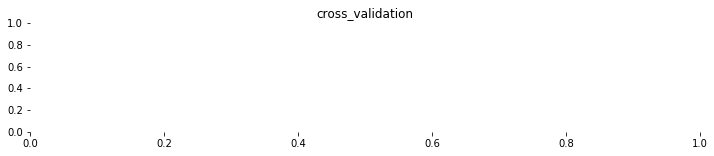

In [4]:
from tools import *
plots.plot_cross_validation()

### K折交叉验证

In [4]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


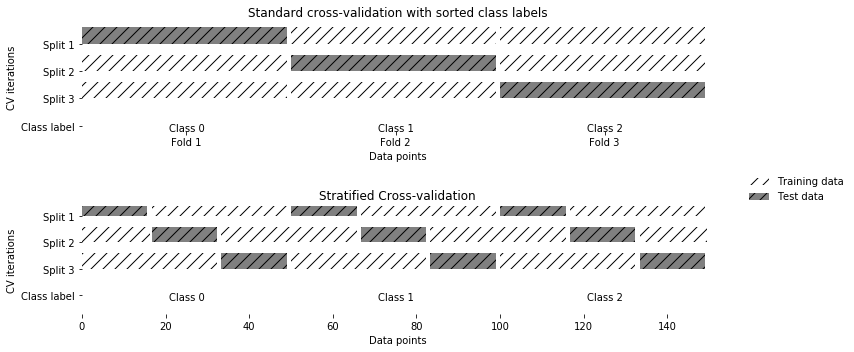

In [5]:
plots.plot_stratified_cross_validation()

### sklearn中的交叉验证

In [6]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("cross-validation scores: ", scores)

cross-validation scores:  [0.96078431 0.92156863 0.95833333]


In [7]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
scores

array([1.        , 0.96666667, 0.93333333, 0.9       , 1.        ])

In [8]:
scores.mean()

0.9600000000000002

### 不同的数据切分方式

#### K折交叉验证（手动指定K折切分）

In [9]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [10]:
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1.        , 0.93333333, 0.43333333, 0.96666667, 0.43333333])

In [11]:
kfold = KFold(n_splits=3)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0., 0., 0.])

In [12]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0.9 , 0.96, 0.96])

#### 留一交叉验证

In [13]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("number of cv iterations: ", len(scores))
print("mean accuracy: ", scores.mean())

number of cv iterations:  150
mean accuracy:  0.9533333333333334


#### 乱序分割交叉验证

In [14]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10)
cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

array([0.90666667, 0.88      , 0.93333333, 0.86666667, 0.94666667,
       0.93333333, 0.96      , 0.97333333, 0.93333333, 0.97333333])

#### 分层抽样交叉验证

根据标签类别分层抽样的kfold


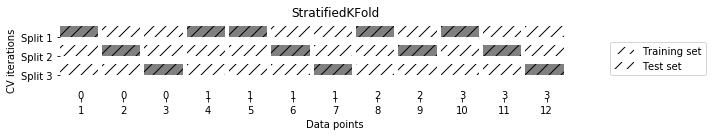

In [15]:
print("根据标签类别分层抽样的kfold")
plots.plot_label_kfold()

In [16]:
from sklearn.model_selection import StratifiedKFold
from tools.datasets import make_blobs
# 构建数据集
X, y = make_blobs(n_samples=12, random_state=0)
# 敲定一组label，做分层抽样交叉验证
labels = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
cross_val_score(logreg, X, y, labels, cv=StratifiedKFold(n_splits=3))

array([1.  , 1.  , 0.75])

## 网格搜索/Grid Search

### 手动遍历超参数进行超参数选择（训练集+验证集）
我们用训练集进行模型拟合，用验证集做效果评估和参数选择

In [17]:
# naive grid search implementation
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: %d   size of test set: %d" % (X_train.shape[0], X_test.shape[0]))

best_score = 0

# for循环遍历参数列表
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 使用对应的参数组初始化模型对象
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 评估svm
        score = svm.score(X_test, y_test)
        # 保留最高得分和对应参数
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
            
print("最高得分: ", best_score)
print("最好的参数: ", best_parameters)

Size of training set: 112   size of test set: 38
最高得分:  0.9736842105263158
最好的参数:  {'C': 100, 'gamma': 0.001}


In [18]:
best_score

0.9736842105263158

### 训练集+验证集+测试集
- 训练集：拟合和模型训练
- 验证集：使用不同参数组在验证集上实验，用于参数调优
- 测试集：模型评估

数据切分


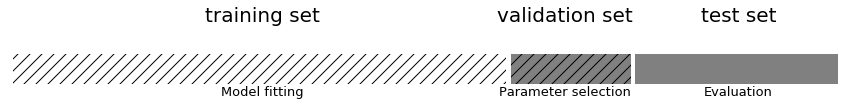

In [19]:
print("数据切分")
plots.plot_threefold_split()

In [20]:
from sklearn.svm import SVC
# 训练集+测试集
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# 真正的训练集+验证集
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)

print("训练集数据量: %d，验证集数据量: %d，测试集数据量: %d" % (X_train.shape[0], X_valid.shape[0], X_test.shape[0]))
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 评估
        score = svm.score(X_valid, y_valid)
        # 保留最高得分
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 在测试数据上评估
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("验证集上最高得分: ", best_score)
print("最佳参数: ", best_parameters)
print("验证集选出最好的参数上测试集的得分为: ", test_score)

训练集数据量: 84，验证集数据量: 28，测试集数据量: 38
验证集上最高得分:  0.9642857142857143
最佳参数:  {'C': 10, 'gamma': 0.001}
验证集选出最好的参数上测试集的得分为:  0.9210526315789473


### GridSearchCV = grid_search(产出候选超参数) + cross_validation(评估方式)
### RandomizedSearchCV

In [21]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
param_grid

# 超参数1：5种取值
# 超参数2：3种取值
# 超参数3：6种取值
# 5-fold交叉验证，要建多少次模型用于评估？
# 5*3*6*5 + 1

# 有加速的方法吗？ （并行化、加资源...）

# depth:[3,5,7,10]
# min_child:[20,50,100]
# lr:[0.01,0.1,1,10]

# 7 50 0.1
# 周边搜索

# [10,20,10]

{'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

In [22]:
# param_grid是参数列表
# GridSearchCV是网格搜索交叉验证对象，fit之后可以对参数列表中的参数组进行拟合和交叉验证评估
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [24]:
import warnings
warnings.filterwarnings("ignore")

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [25]:
grid_search.score(X_test, y_test)

0.9736842105263158

In [26]:
# 最好的超参数 和 最高得分
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'gamma': 0.01}
0.9732142857142857


In [27]:
grid_search.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### 附：模型候选超参数参考表

![](./image/model_param.png)

### 检视交叉验证的结果

In [28]:
grid_search.cv_results_

{'mean_fit_time': array([0.00079761, 0.00076942, 0.00064292, 0.00067854, 0.00073237,
        0.00063915, 0.00063214, 0.00060802, 0.00061374, 0.0006732 ,
        0.00072021, 0.00080457, 0.00061007, 0.00060587, 0.00053015,
        0.00057068, 0.00066557, 0.00068288, 0.00065684, 0.00046954,
        0.00039735, 0.0004653 , 0.00082374, 0.00081391, 0.00046706,
        0.00038743, 0.00037637, 0.00046883, 0.00084605, 0.00082693,
        0.00040879, 0.0003809 , 0.00041556, 0.00051599, 0.00081291,
        0.00085263]),
 'mean_score_time': array([0.00036645, 0.00034838, 0.00030875, 0.00030808, 0.00035334,
        0.0003376 , 0.00029087, 0.00030756, 0.00030723, 0.00033221,
        0.00037718, 0.00031981, 0.00029469, 0.00028276, 0.00027714,
        0.0002799 , 0.00029116, 0.00029168, 0.00029917, 0.00027971,
        0.00025983, 0.00025859, 0.00030398, 0.00028811, 0.00027537,
        0.00024991, 0.00025387, 0.00030575, 0.00027533, 0.00028982,
        0.00028825, 0.00025721, 0.0002934 , 0.00028038, 0.

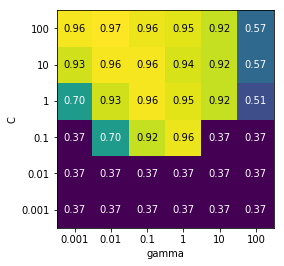

In [29]:
import numpy as np
scores = grid_search.cv_results_['mean_test_score']
scores = np.array(scores).reshape(6, 6)

# plot the mean cross-validation scores
tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                      yticklabels=param_grid['C'], cmap="viridis")

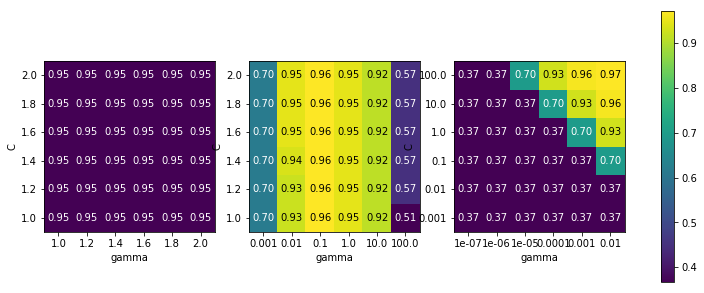

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                     'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score']
    scores = np.array(scores).reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = tools.heatmap(scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
                                         yticklabels=param_grid['C'], cmap="viridis", ax=ax)
    
plt.colorbar(scores_image, ax=axes.tolist())

### 手动切分数据交叉验证
在有一些问题中，我们不能直接对数据进行随机切分，比如分类问题中，如果类别是不均衡的(非1:1)，我们不能直接随机切分，更多的情况下，我们会手动切分，并且保证每个fold中的样本比例一致。

In [31]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print("交叉验证得分: ", scores)
print("平均交叉验证得分: ", scores.mean())

交叉验证得分:  [0.96666667 1.         0.96666667 0.96666667 1.        ]
平均交叉验证得分:  0.9800000000000001


In [32]:
def nested_cv(X, y, inner_cv, outer_cv, Classifier, parameter_grid):
    outer_scores = []
    # 手动切分训练集和测试集(几折交叉)
    for training_samples, test_samples in outer_cv.split(X, y):
        # 初始化最好的参数存储的字典:
        best_parms = {}
        best_score = -np.inf
        # 遍历参数
        for parameters in parameter_grid:
            # 记录不同参数交叉验证实验得分
            cv_scores = []
            # 再把训练集做几折切分内部切分为 真正的训练集 和 验证集
            for inner_train, inner_test in inner_cv.split(X[training_samples], y[training_samples]):
                clf = Classifier(**parameters)
                clf.fit(X[inner_train], y[inner_train])
                score = clf.score(X[inner_test], y[inner_test])
                cv_scores.append(score)
            # 交叉验证的平均结果
            mean_score = np.mean(cv_scores)
            if mean_score > best_score:
                best_score = mean_score
                best_params = parameters
        clf = Classifier(**best_params)
        clf.fit(X[training_samples], y[training_samples])
        outer_scores.append(clf.score(X[test_samples], y[test_samples]))
    return outer_scores

In [33]:
from sklearn.model_selection import ParameterGrid, StratifiedKFold
nested_cv(iris.data, iris.target, StratifiedKFold(5), StratifiedKFold(5), SVC, ParameterGrid(param_grid))

[0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667, 1.0]